## Table of contents
1. [Introduction](#intro)  
    1.1 [Data explanation](#data)  
2. [Data cleaning](#clean)  
    2.1 [Duplicates](#dupli)  
    2.2 [Missing values](#missing)  
    2.3 [Split train test data](#split)
3. [Exploration & preparation](#explore)  
    3.1 [Imputation](#imp)  
    3.2 [Feature engineering](#eng)  
    3.3 [Normalize](#norm)  
    3.4 [Feature scaling](#scale)   
    3.5 [Transformation pipeline](#pipe)   
5. [Model](#model)  
    5.1 [Performance](#performance)  
6. [Recommendations](#recommend)

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='intro'></a>
## 1. Introduction

**Source**
https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.

**Goal**
Build a machine learning model to predict whether or not the patients in the dataset have diabetes or not.

<a id='data'></a>
### 1.1 Data explanation

In [2]:
# load data
df = pd.read_csv('datasets_228_482_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.shape

(768, 9)

In [92]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

There seem to be 768 women included in this dataset  
The predictor variables included are: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'  
The outcome variable is: Outcome: wether someone has diabetes yes(1) or no(0)

**Predictor variables explanation**   
    0. Number of times pregnant.  
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  
    2. Diastolic blood pressure (mm Hg).  
    3. Triceps skinfold thickness (mm).  
    4. 2-Hour serum insulin (mu U/ml).  
    5. Body mass index (weight in kg/(height in m)^2).  
    6. Diabetes pedigree function: a function which scores likelihood of diabetes based on family history.  
    7. Age (years).  

<a id='clean'></a>
## 2. Data cleaning

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a id='dupli'></a>
### 2.1 Check and remove duplicates

In [94]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No duplicated data

<a id='missing'></a>
### 2.2 Check and handle missing values

In [95]:
df[df.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


No missing values

<a id='split'></a>
### 2.3 Split train test data

In [96]:
df['Outcome'].sum()/df.shape[0]*100

34.89583333333333

Not fully balanced dataset, with 35% of the patients having diabetes

**Before having any look at the data!!!**  
Split data into train and hold out test set, stratified on outcome
TrainCV - Test set split: 80 - 20  
  
Note: Make sure all the transformations are also performed on the test set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# split X and y
X = df.iloc[:,:-1]
y = df['Outcome']

In [5]:
X_trainCV, X_test, y_trainCV, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

<a id='explore'></a>
## 3. Exploration & preparation

* histograms
* correlation plot
* outliers
* groupby
* normality

In [26]:
# combine X_trainCV and y_trainCV for exploration purposes
df_train = pd.merge(X_trainCV, y_trainCV, left_index=True, right_index=True)

In [27]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.833876,121.247557,68.758958,19.863192,75.644951,31.753583,0.448393,33.198697,0.348534
std,3.275560,31.934792,20.108934,15.811930,114.733641,7.854933,0.303550,11.802187,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.025000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,0.000000,32.000000,0.355500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,120.000000,36.500000,0.587000,40.750000,1.000000
max,14.000000,198.000000,122.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


Wow, someone had 14 pregnancies!  
Also, a diastolic BP of 122 seems quite high.  
Let's explore ourliers a bit more as well as differences between outcome groups.  

All the variables are numerical variables, so correlation plots might give some insights into variables that discriminate between outcomes.  
What I'm looking for are variables where the 2 outcome groups overlap the least.  

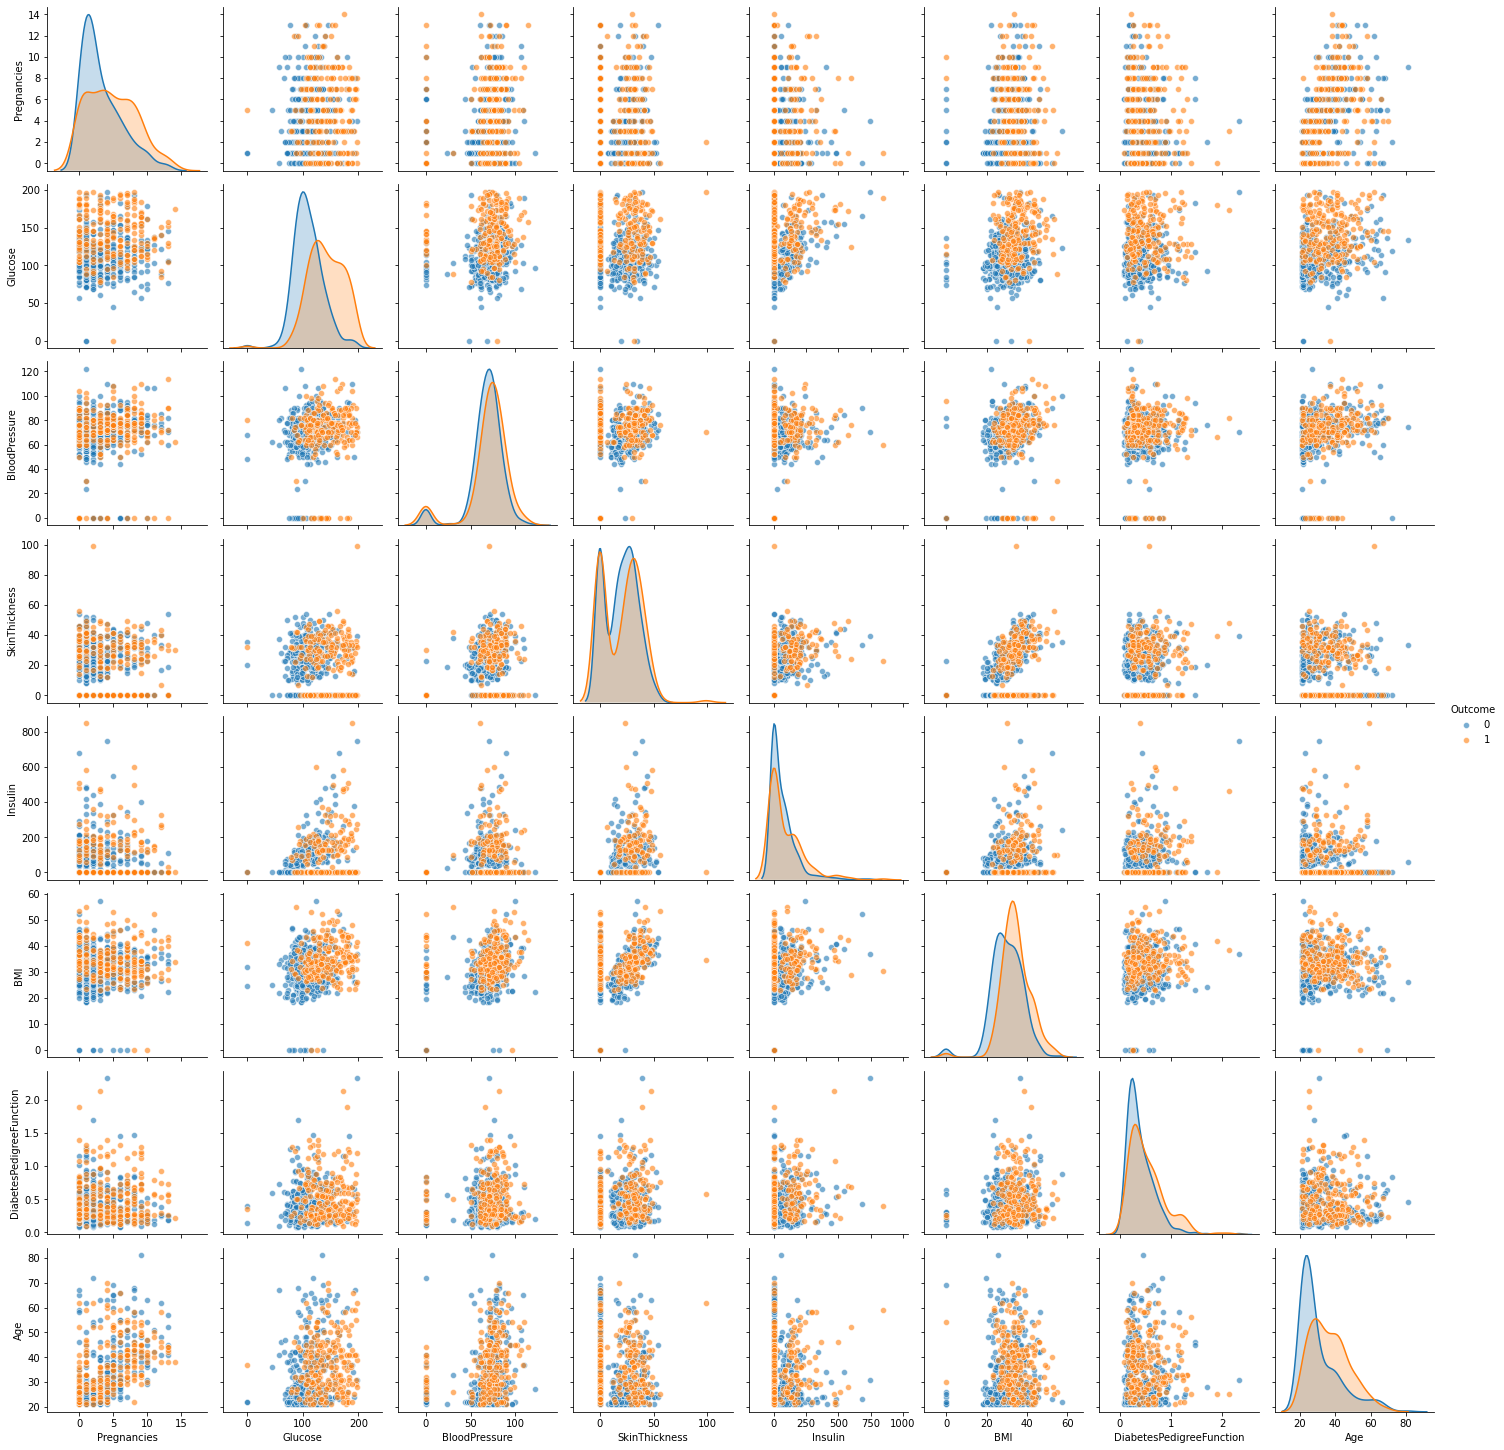

In [102]:
sns.pairplot(df_train, hue='Outcome', plot_kws = {'alpha': 0.6})

A few things become clear after looking at this graph:
- Glucose in itself seems to be a factor that has most discriminative power.  
- The blobs in glucose vs BMI seem to overlap the least, so it might be useful to use a combination of these parameters as a predictor in a model.  
- There do seem to be some zeros that indicate missing values (ie. where 0 seems an incorrect value) e.g. glucose, bloodpressure, skin thickness, insulin, and BMI. I'm going to impute these with the median for each outcome group (since not all distributions are normal, the median makes more sense than the mean).  
- Most features not normally distributed

<a id='imp'></a>
### 3.1 Imputation

In [28]:
# variables with incorrect zeros: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'
imputation_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [29]:
# mark zero values as missing or NaN
df_train[imputation_cols] = df_train[imputation_cols].replace(0, np.nan)

In [30]:
print('Before n NAs:', np.isnan(df_train[imputation_cols].values).sum())

Before n NAs: 545


In [31]:
from sklearn.impute import KNNImputer

# define the imputer
imputer = KNNImputer(n_neighbors=5)
# transform the dataset
transformed_array = imputer.fit_transform(df_train[imputation_cols].values)
transformed_df = pd.DataFrame(transformed_array, columns=imputation_cols, index=df_train[imputation_cols].index)
# replace in org df
df_train[imputation_cols] = transformed_df

In [32]:
print('After n NAs:', np.isnan(df_train[imputation_cols].values).sum())

After n NAs: 0


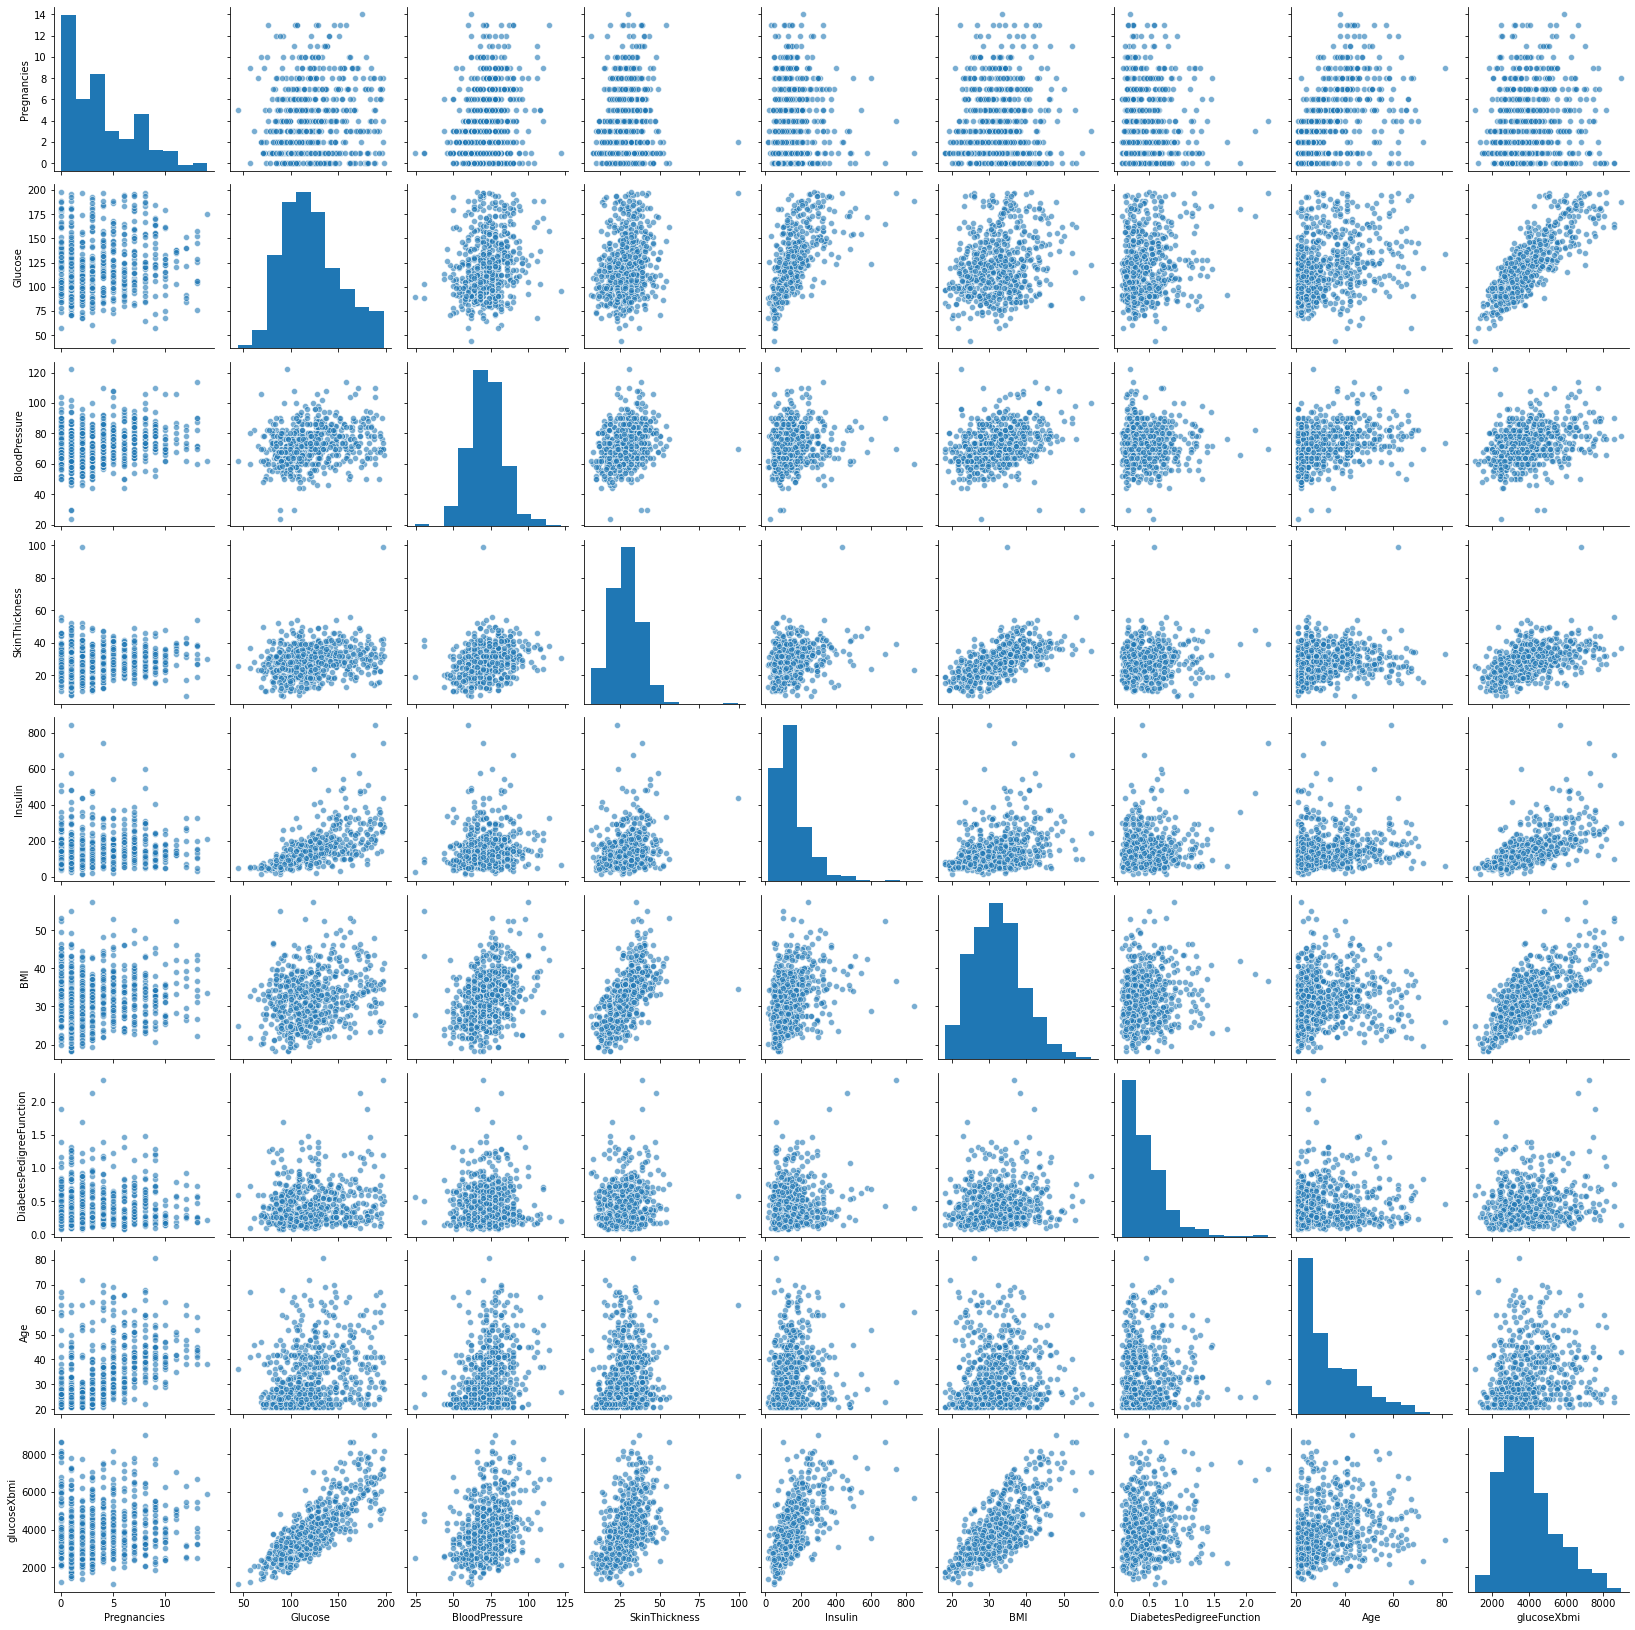

In [204]:
#sns.pairplot(X_trainCV, plot_kws = {'alpha': 0.6})

'median' impuation strategy creates bands in the data -> kNN strategy looks a lot better. Two samples are close if the features that neither is missing are close.Based on default of 5 neighbors.  
Wondering if it would be 'fair' to impute per outcome group, since the NAs are not equally distributed between outcome groups. 

<a id='eng'></a>
### 3.2 Feature engineering

In [33]:
# glucose * BMI
df_train['glucoseXbmi'] = df_train['Glucose'] * df_train['BMI']

**To do:** Automatic feature eng

<a id='norm'></a>
### 3.3 Normalize

In [19]:
def plot_kdes(df, columns, number_rows, figsize=(12,12)):
    """
    Returns a histogram per column and target
    Parameters:
        columns: list of columns to plot
        target: str, which variable to plot per histograms
        number_rows: number of rows of subplots
    """
    fig = plt.figure()
    count = 1
    for col in columns:
        ax = fig.add_subplot(number_rows,3,count)
        sns.kdeplot(df[col], shade=True)
        ax.set_ylabel('Density')
        ax.set_xlabel(col)
        ax.legend().set_visible(False)
        count+=1
    plt.tight_layout()

In [41]:
all_features = list(df_train.columns)
all_features.remove('Outcome')

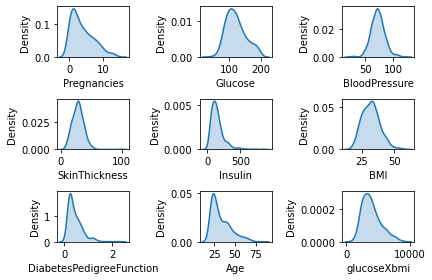

In [45]:
plot_kdes(df=df_train, columns=all_features, number_rows=3)

Some variables seem skewed (e.g. pregnancies, age, DPF) -> see if I need to transform them to remove this skew

In [46]:
# check for normality / skew using D’Agostino’s K^2 Test and Saphiro Wilk Test
from scipy import stats

# normality test
def test_normality(df, columns):
    for col in columns:
        stat, p = stats.normaltest(df[col])
        print(col + ': K2 Statistics=%.3f, p=%.3f' % (stat, p))
        #stat2, p2 = stats.shapiro(df[col])
        #print(col + ': SW Statistics=%.3f, p=%.3f' % (stat2, p2))

In [47]:
test_normality(df_train, all_features)

Pregnancies: K2 Statistics=56.927, p=0.000
Glucose: K2 Statistics=29.509, p=0.000
BloodPressure: K2 Statistics=22.811, p=0.000
SkinThickness: K2 Statistics=124.195, p=0.000
Insulin: K2 Statistics=323.310, p=0.000
BMI: K2 Statistics=21.200, p=0.000
DiabetesPedigreeFunction: K2 Statistics=244.119, p=0.000
Age: K2 Statistics=99.885, p=0.000
glucoseXbmi: K2 Statistics=57.544, p=0.000


Oops, all the variables are deviating from a normal distribution

In [50]:
def log_trans(df, columns):
    df_trans = pd.DataFrame()
    for col in columns:
        transformed_data = np.log1p(df[col])
        df_trans = pd.concat([df_trans, transformed_data], axis=1)
    return df_trans

In [51]:
df_transf = log_trans(df_train, all_features)

In [52]:
test_normality(df_transf, df_transf.columns)

Pregnancies: K2 Statistics=86.996, p=0.000
Glucose: K2 Statistics=1.557, p=0.459
BloodPressure: K2 Statistics=111.677, p=0.000
SkinThickness: K2 Statistics=39.027, p=0.000
Insulin: K2 Statistics=3.085, p=0.214
BMI: K2 Statistics=3.015, p=0.222
DiabetesPedigreeFunction: K2 Statistics=101.468, p=0.000
Age: K2 Statistics=56.552, p=0.000
glucoseXbmi: K2 Statistics=1.853, p=0.396


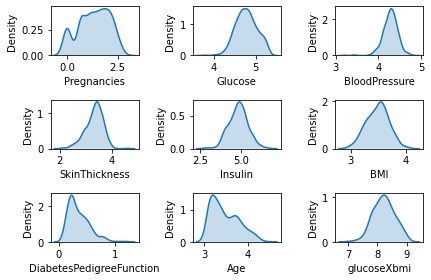

In [53]:
plot_kdes(df=df_transf, columns=df_transf.columns, number_rows=3)

Log transform works for Glucose, Insulin, BMI, glucoseXbmi so only use for those features. Leave the others for now.

<a id='scale'></a>
### 3.4 Feature scaling

In [55]:
# Standardization: z = (x - u) / sd -> u = 0, sd = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_train[all_features])
feature_df_scaled = pd.DataFrame(scaled_array, columns=all_features, index=df_train.index)
# replace in org df
df_train[all_features] = feature_df_scaled

In [56]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucoseXbmi
291,-1.171404,-0.482585,-0.865888,0.157266,-0.781942,0.642738,1.017490,-0.695242,1,-0.046285
652,0.356298,0.037514,0.124067,1.224008,-0.751926,0.270092,-0.591464,-0.440845,0,0.143383
244,-0.560323,0.785157,0.289059,0.690637,0.418704,0.881231,-0.393641,-0.356046,0,1.086537
1,-0.865863,-1.197721,-0.535903,0.050592,-0.972044,-0.847846,-0.321107,-0.186448,0,-1.175150
633,-0.865863,0.200045,0.784036,-1.229498,0.308645,-0.713693,-1.099207,-0.949640,0,-0.316498


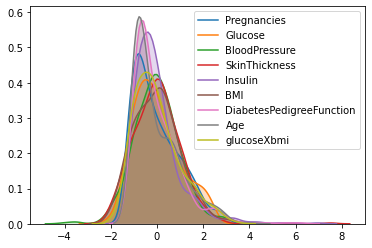

In [60]:
for col in all_features:
    sns.kdeplot(df_train[col], shade=True)

Distributions are quite equal now, no massive skew

<a id='pipe'></a>
### 3.5 Transformation pipeline

These transformations were all done on a copy of X_trainCV to explore which transformations I should apply.    
Now create a pipeline that fit_transforms the train part of X_trainCV (so make sure it doesn't use the CV part) and then can transform X_test (so don't fit on X_test!)  

Which column which transformation?:

- Impute zeros: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
    - Replace zeros with NA: custom class
    - Impute NA using KNNImputer(n_neighbors=5)
- Feature engineering: Glucose * BMI: Custom class FeatureAdder()
- Log transform: ['Glucose', 'Insulin', 'BMI', 'glucoseXbmi']
    - FunctionTransformer np.log1p
- Standard scaling: all: list(X_trainCV.columns)
    - StandardScaler()

In [6]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
X_trainCV_copy = X_trainCV.copy()

In [8]:
X_trainCV_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.833876,121.247557,68.758958,19.863192,75.644951,31.753583,0.448393,33.198697
std,3.275560,31.934792,20.108934,15.811930,114.733641,7.854933,0.303550,11.802187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.025000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,22.000000,0.000000,32.000000,0.355500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,120.000000,36.500000,0.587000,40.750000
max,14.000000,198.000000,122.000000,99.000000,846.000000,57.300000,2.329000,81.000000


In [9]:
imputation_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
class ZeroToNan(TransformerMixin, BaseEstimator):
    '''Replace zeros with np.nan'''
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.replace(0, np.nan)


In [11]:
zeroer = ColumnTransformer(
    [('zero_nan', ZeroToNan(), imputation_cols)],
     remainder='drop')
df_trans = pd.DataFrame(zeroer.fit_transform(X_trainCV_copy), columns=imputation_cols, index=X_trainCV_copy.index)
X_trainCV_copy[imputation_cols] = df_trans

If remainder = 'passthrough' the order of the columns will be changed

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureAdder(TransformerMixin, BaseEstimator):
    '''Adds custom features as columns to X'''
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['glucoseXbmi'] = X['Glucose'] * X['BMI']
        return X

In [14]:
feature_add = FeatureAdder()
X_trainCV_copy_trans = feature_add.transform(X_trainCV_copy)
X_trainCV_copy_trans.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucoseXbmi
291,0,107.0,62.0,30.0,74.0,36.6,0.757,25,3916.2
652,5,123.0,74.0,40.0,77.0,34.1,0.269,28,4194.3
244,2,146.0,76.0,35.0,194.0,38.2,0.329,29,5577.2
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,2261.0
633,1,128.0,82.0,17.0,183.0,27.5,0.115,22,3520.0


In [13]:
log_trans = FunctionTransformer(np.log1p)

In [15]:
from sklearn.preprocessing import FunctionTransformer
log_trans = FunctionTransformer(np.log1p)
X_trainCV_copy_trans2 = log_trans.transform(X_trainCV_copy)
X_trainCV_copy_trans2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucoseXbmi
291,0.000000,4.682131,4.143135,3.433987,4.317488,3.627004,0.563608,3.258097,8.273132
652,1.791759,4.820282,4.317488,3.713572,4.356709,3.558201,0.238229,3.367296,8.341720
244,1.098612,4.990433,4.343805,3.583519,5.273000,3.668677,0.284427,3.401197,8.626621
1,0.693147,4.454347,4.204693,3.401197,NaN,3.317816,0.300845,3.465736,7.724005
633,0.693147,4.859812,4.418841,2.890372,5.214936,3.349904,0.108854,3.135494,8.166500


### Make a pipeline per set of columns that get the same tranformations

In [16]:
imputation_cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# ToDo: fix feature adder

In [18]:
pipeline_A = Pipeline([
    ('zero_nan', ZeroToNan()),
    ('impute', KNNImputer(n_neighbors=5)),
    #('feature_add', FeatureAdder()),
    ('log_trans', FunctionTransformer(np.log1p)),
    ('std_scaler', StandardScaler())
     ])

In [17]:
other_cols = list(set(X_trainCV) - set(imputation_cols))
other_cols

['Age', 'DiabetesPedigreeFunction', 'Pregnancies']

In [19]:
pipeline_B = Pipeline([
    ('std_scaler', StandardScaler())
     ])

In [20]:
full_pipeline = ColumnTransformer([
    ("imp", pipeline_A, imputation_cols),
    ("scale", pipeline_B, other_cols),
])
X_trainCV_prepared = full_pipeline.fit_transform(X_trainCV)

In [21]:
X_trainCV.shape

(614, 8)

In [22]:
X_trainCV_prepared.shape

(614, 8)

In [120]:
X_trainCV_prepared[:5,:]

array([[-0.39169473, -0.81599995,  0.30297373, -0.91110718,  0.70412733,
        -0.69524249, -1.17140352,  1.01749027],
       [ 0.16160439,  0.20066877,  1.13656749, -0.84484171,  0.36301404,
        -0.44084506,  0.35629776, -0.59146371],
       [ 0.84306786,  0.35412712,  0.74880874,  0.70327997,  0.91073353,
        -0.35604591, -0.56032301, -0.3936415 ],
       [-1.30398093, -0.45705089,  0.20520953, -1.40468712, -0.82877606,
        -0.18644763, -0.86586326, -0.32110669],
       [ 0.3199274 ,  0.79166337, -1.31783805,  0.6051781 , -0.6696876 ,
        -0.94963992, -0.86586326, -1.09920738]])

In [23]:
new_cols = imputation_cols + other_cols

In [24]:
df_trans = pd.DataFrame(X_trainCV_prepared, columns=new_cols, index=X_trainCV_copy.index)
df_trans.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Pregnancies
291,-0.391695,-0.816000,0.302974,-0.911107,0.704127,-0.695242,1.017490,-1.171404
652,0.161604,0.200669,1.136567,-0.844842,0.363014,-0.440845,-0.591464,0.356298
244,0.843068,0.354127,0.748809,0.703280,0.910734,-0.356046,-0.393641,-0.560323
1,-1.303981,-0.457051,0.205210,-1.404687,-0.828776,-0.186448,-0.321107,-0.865863
633,0.319927,0.791663,-1.317838,0.605178,-0.669688,-0.949640,-1.099207,-0.865863


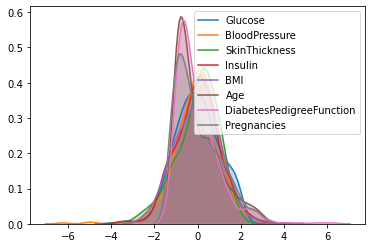

In [25]:
for col in new_cols:
    sns.kdeplot(df_trans[col], shade=True)

In [ ]:
# run transformation pipeline on test set

In [109]:
# To do:
# Check distr variables in test vs train en of stratified eerlijk gewerkt heeft

<a id='model'></a>
## 5. Model

Let's try out a bunch of classifiers, all with default parameters.

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [ ]:
compareABunchOfDifferentModelsAccuracy(X_train2, y_train, X_test2, y_test)
defineModels()
# iterate over classifiers; adapted from https://www.kaggle.com/hugues/basic-ml-best-of-10-classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train2, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

<a id='performance'></a>
### 5.1 Performance

Explain why I use which performance measure  